# Manipulating fMRI data and computing a connectome

## Loading the data

For this tutorial, we will use the data provided by the `nilearn.datasets` module.
We first download some fMRI data from 1 subject

In [44]:
from nilearn import datasets
import numpy as np
import nibabel as nib
from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
import numpy as np
from nilearn import plotting
from nilearn.plotting import plot_connectome
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat

In [36]:
main_dir = '/home/usuario/disco1/CarpetasPersonales/seba'

subject_list = glob(f'{main_dir}/analizar/*.nii')

correlaciones = np.zeros((133,39,39))

for isub, sub in enumerate(subject_list):
    
    fmri_img = nib.load(sub)
    fmri_data = fmri_img.get_fdata()
    atlas_dataset = datasets.fetch_atlas_msdl()
    atlas_filepath = atlas_dataset.maps
    labels = atlas_dataset.labels
    atlas_masker = NiftiMapsMasker(maps_img=atlas_filepath, standardize=True)
    data_in_atlas = atlas_masker.fit_transform(sub)
    
    #conectoma

    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix = correlation_measure.fit_transform([data_in_atlas])[0]
    correlaciones[isub,:,:] = correlation_matrix


/home/usuario/.local/lib/python3.8/site-packages/joblib/memory.py:349: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
/home/usuario/.local/lib/python3.8/site-packages/nilearn/connectome/connectivity_matrices.py:495: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [
/home/usuario/.local/lib/

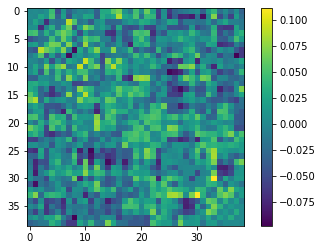

In [45]:

# Separate control and patient correlations
c_control = correlaciones[:83, :, :]
c_paciente = correlaciones[83:, :, :]

# Calculate average for control and patient
promedio_control = np.mean(c_control, axis=0)
promedio_paciente = np.mean(c_paciente, axis=0)

# Plot the difference between control and patient averages
plt.imshow(promedio_control - promedio_paciente)
plt.colorbar()
plt.show()

# Save the correlation matrices
output_data = {
    'c_control': c_control,
    'c_paciente': c_paciente
}
savemat('correlation_matrices.mat', output_data)


/home/usuario/.local/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figure)


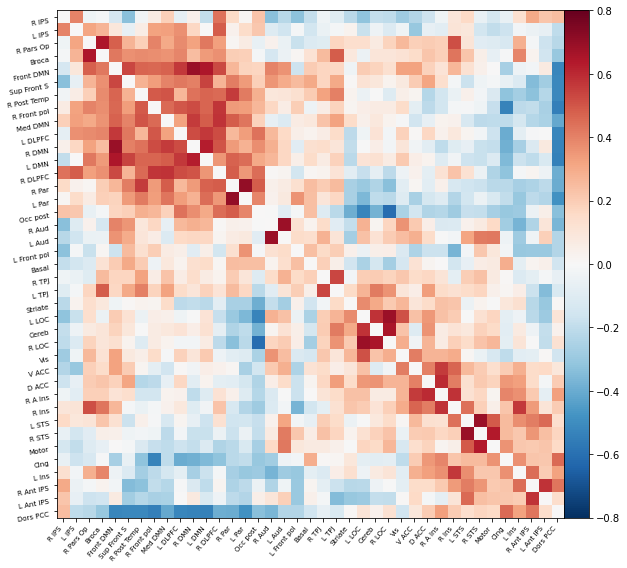

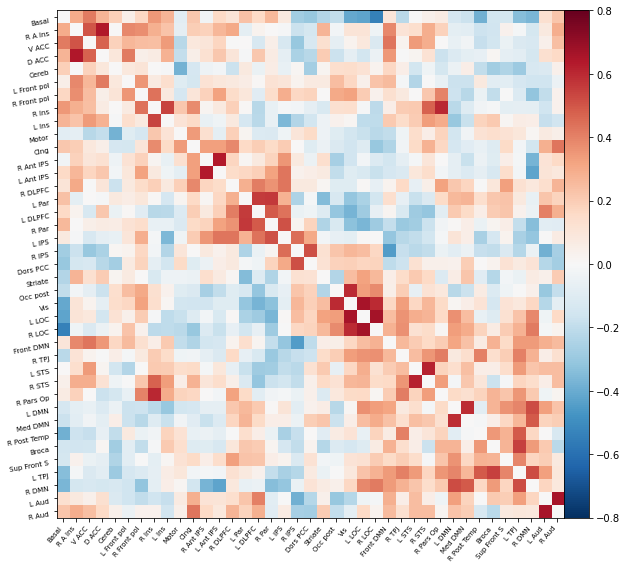

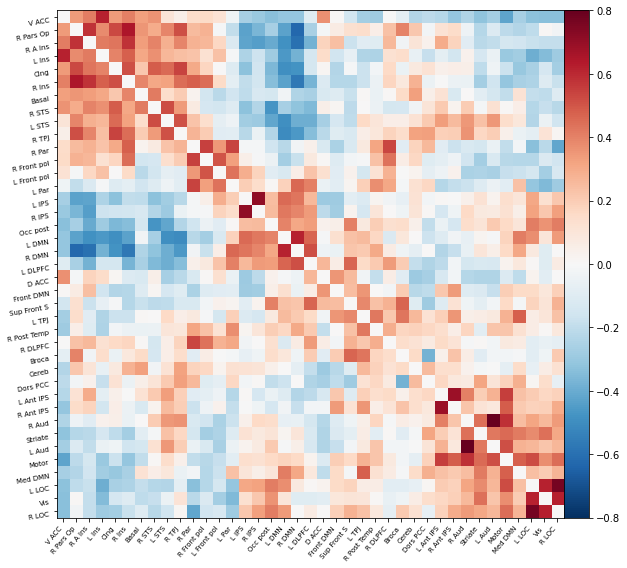

Error in callback <function flush_figures at 0x7f1ace971040> (for post_execute):


KeyboardInterrupt: 

In [50]:
n_subjects, n_regions, _ = c_control.shape
c_control_reshaped = c_control.copy()

for i in range(n_subjects):
    np.fill_diagonal(c_control_reshaped[i, :, :], 0)

# Plot the correlation matrix
for i in range(n_subjects):
    plotting.plot_matrix(c_control_reshaped[i, :, :], figure=(10, 8), labels=labels,
                         vmax=0.8, vmin=-0.8, reorder=True)

# Plot the connectome
coords = atlas_dataset.region_coords
for i in range(n_subjects):
    plotting.plot_connectome(c_control_reshaped[i, :, :], coords,
                             edge_threshold="97%", colorbar=True)


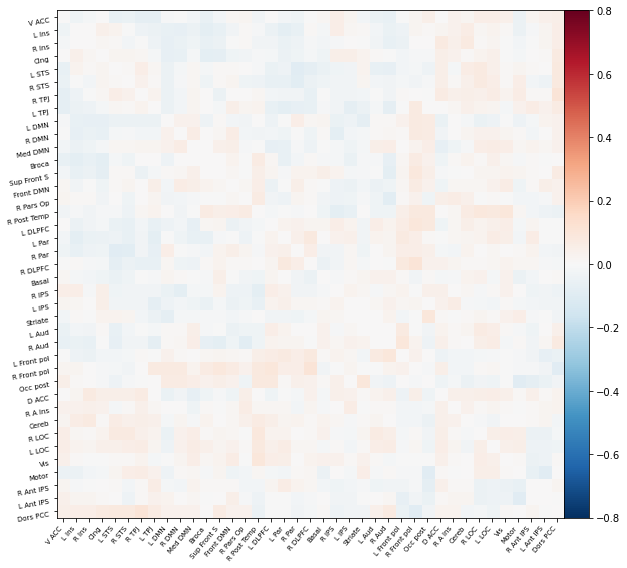

In [52]:
import numpy as np

# Extract the control and patient data
c_control = correlaciones[:83, :, :]
c_paciente = correlaciones[84:, :, :]

# Calculate the mean correlation matrix for controls and patients
mean_control = np.mean(c_control, axis=0)
mean_patient = np.mean(c_paciente, axis=0)

# Plot the difference between the mean control and patient correlation matrices
diff_matrix = mean_control - mean_patient
plotting.plot_matrix(diff_matrix, figure=(10, 8), labels=labels,
                     vmax=0.8, vmin=-0.8, reorder=True)

